In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [36]:

social_N_data = pd.read_csv('Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [37]:
#kiểm tra các giá trị còn thiếu.
social_N_data.isnull().any()
#Không có giá trị null trong tập dữ liệu.

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Purchased', ylabel='count'>

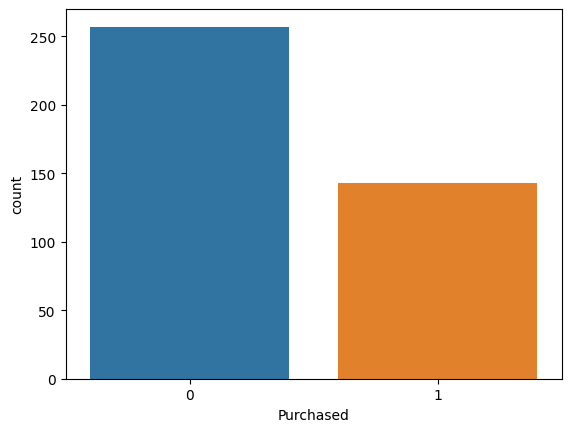

In [38]:
#Kiểm tra tổng số người đã mua và những người không mua:
sns.countplot(x='Purchased', data=social_N_data)
#Số 0 biểu thị những người không mua và 1 cho những người đã mua.

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Purchased', ylabel='count'>

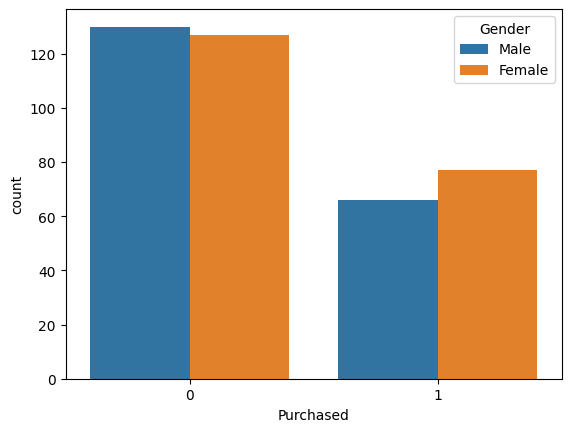

In [39]:
#Kiểm tra xem có bao nhiêu nam và nữ đã mua sản phẩm:
sns.countplot(x='Purchased', hue='Gender', data=social_N_data)

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


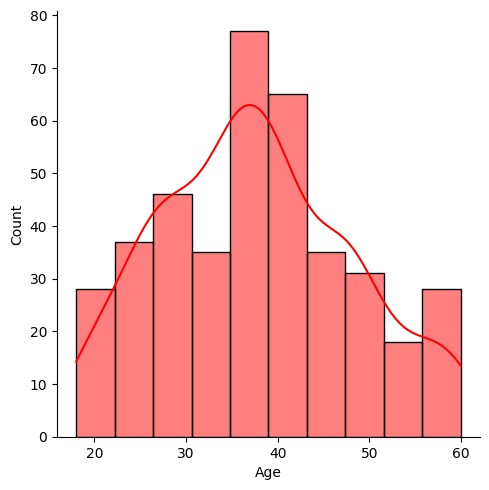

In [40]:
#Chúng tôi cũng có thể kiểm tra phân bố độ tuổi trong tập dữ liệu:
sns.displot(x='Age', data=social_N_data, color='red', kde=True)

<h5>Làm sạch dữ liệu

In [41]:
social_N_data.drop('User ID', axis=1, inplace=True)

##### Thay đổi dữ liệu phân loại thành hình nộm

In [42]:
social_N_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


##### Biến này Gendercó tính chất phân loại. Để mô hình hoạt động, chúng tôi sẽ chuyển đổi nó thành các biến giả bằng cách sử dụng Pandas get_dummieshoặc oneHotEncoderphương thức.
##### Thay đổi Genderbiến giả và loại bỏ biến giả đầu tiên để tránh hiện tượng đa cộng tuyến:

In [43]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)
gender

,Male
0,True
1,True
2,False
3,False
4,True
...,...
395,False
396,True
397,False
398,True


In [44]:
social_N_data.drop('Gender',axis=1,inplace=True)

In [45]:
social_N_data = pd.concat([social_N_data,gender], axis=1)

In [46]:
social_N_data.head()
# nam True 0
# nữ flase 1

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


##### Tách dữ liệu thành các biến độc lập (X) và phụ thuộc (y)
##### Chia dữ liệu thành các biến độc lập và phụ thuộc.

In [47]:
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
X.head()

,Age,EstimatedSalary,Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


In [48]:
y = social_N_data.iloc[:, 2] # Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### Chia tỷ lệ tính năng
### Chia tỷ lệ đặc trưng là một phương pháp được sử dụng để chuẩn hóa phạm vi của các biến độc lập. Phương pháp này cho phép các biến độc lập nằm trong cùng một phạm vi.

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

### Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra

In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 3)
(40, 3)
(360,)
(40,)


### 
Lắp mô hình hồi quy logistic và dự đoán kết quả kiểm tra

In [51]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [69]:
last_row_output = y_train.iloc[-1]

print("Giá trị đầu ra của dòng cuối cùng trên tập huấn luyện:", last_row_output)

Giá trị đầu ra của dòng cuối cùng trên tập huấn luyện: 1


In [71]:
first_row_prediction = classifier.predict(X_test)

print("Giá trị dự đoán trước khi áp dụng hàm sigmoid cho dòng đầu tiên:", first_row_prediction)

Giá trị dự đoán trước khi áp dụng hàm sigmoid cho dòng đầu tiên: [0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0]


In [ ]:
last_row_prediction = y_pred[-1]

print("Kết quả dự báo cuối cùng cho giá trị mua hàng trong tập dữ liệu test:", last_row_prediction)

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
332,0,0
111,0,0
352,1,1
205,0,1
56,0,0
379,1,1
81,0,0
214,0,1
142,0,0
110,0,0


In [72]:
last_row_prediction = y_pred[-1]

print("Kết quả dự báo cuối cùng cho giá trị mua hàng trong tập dữ liệu test:", last_row_prediction)

Kết quả dự báo cuối cùng cho giá trị mua hàng trong tập dữ liệu test: 0


In [75]:
prediction = y_pred[0]
prediction
# Áp dụng hàm sigmoid

# print("Giá trị sau khi đi qua hàm sigmoid cho dòng đầu tiên trên tập test:", sigmoid_value)

0

### Các thuộc tính coef_và intercept_cung cấp hệ số và điểm chặn của mô hình.

In [55]:
classifier.coef_
# array([[2.36839196, 1.42929561, 0.20973787]])
# 3 đặc trưng của mảng

array([[2.15200421, 1.08592164, 0.15798615]])

In [56]:
classifier.intercept_   
# Đây là hệ số góc của mô hình logistic regression

array([-1.03526656])

In [57]:
print('prediction with threshold 0.45:')
y_pred_test_new_threshold = (classifier.predict_proba(X_test)[:,1]>=0.45).astype(int)
y_pred_test_new_threshold

prediction with threshold 0.45:


array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

# Đánh giá mô hình

#### sử dụngpredict_proba
Nó trả về ma trận xác suất mà đầu ra được dự đoán bằng 0 hoặc một.

In [58]:
print (classifier.predict_proba(X))
# cột một là không mua 
# cột 2 mua

[[0.99821508 0.00178492]
 [0.95284423 0.04715577]
 [0.9883244  0.0116756 ]
 [0.97782867 0.02217133]
 [0.98911027 0.01088973]
 [0.96888967 0.03111033]
 [0.94909559 0.05090441]
 [0.44849167 0.55150833]
 [0.99049982 0.00950018]
 [0.8684215  0.1315785 ]
 [0.96298293 0.03701707]
 [0.98450343 0.01549657]
 [0.98173906 0.01826094]
 [0.9755508  0.0244492 ]
 [0.98926234 0.01073766]
 [0.91100652 0.08899348]
 [0.5938778  0.4061222 ]
 [0.68118455 0.31881545]
 [0.62008296 0.37991704]
 [0.58975644 0.41024356]
 [0.7082237  0.2917763 ]
 [0.48269307 0.51730693]
 [0.41684657 0.58315343]
 [0.76902396 0.23097604]
 [0.65686172 0.34313828]
 [0.63168659 0.36831341]
 [0.46835893 0.53164107]
 [0.63102471 0.36897529]
 [0.97085349 0.02914651]
 [0.98000253 0.01999747]
 [0.89150677 0.10849323]
 [0.77477968 0.22522032]
 [0.99821617 0.00178383]
 [0.98193472 0.01806528]
 [0.91820443 0.08179557]
 [0.94173814 0.05826186]
 [0.97005575 0.02994425]
 [0.95726116 0.04273884]
 [0.97107676 0.02892324]
 [0.99020093 0.00979907]


In [59]:

# Sử dụng ma trận nhầm lẫn
# Từ mô-đun Scikit-learn , chúng tôi nhập các tệp . Ma trận nhầm lẫn là số lượng dự đoán đúng và sai theo cột, hiển thị các giá trị sau: metrics confusion_matrix
# Âm tính thực sự (TN) ở vị trí phía trên bên trái.
# Âm tính giả (FN) ở vị trí phía dưới bên trái.
# Dương tính giả (FP) ở vị trí phía trên bên phải.
# Kết quả dương tính thực sự (TP) ở vị trí phía dưới bên phải.


In [60]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

# Đầu ra của ma trận nhầm lẫn là ma trận 2*2 vì mô hình là phân loại nhị phân. 
# Hãy hình dung nó rõ hơn bằng cách sử dụng bản đồ nhiệt và giải thích.

array([[24,  2],
       [ 1, 13]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

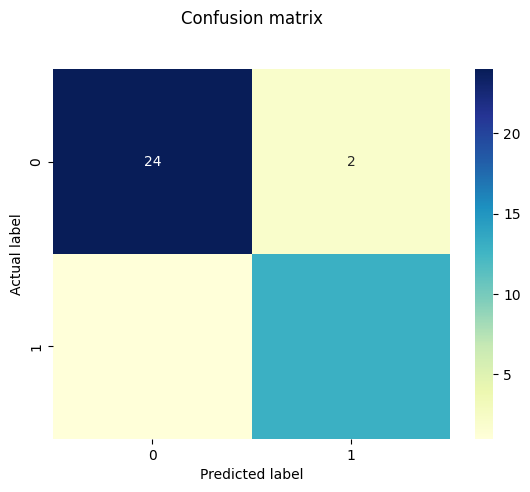

In [61]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 63 dự đoán TN: số 0 được dự đoán chính xác.
### 14 dự đoán FN: những dự đoán sai là số không.
### 9 dự đoán FP: các số 0 được dự đoán sai là số 1.
### 34 dự đoán TP: dự đoán đúng.

Để tính toán độ chính xác của mô hình từ ma trận nhầm lẫn, chúng tôi chia tổng TN và TP cho tổng của tất cả các dự đoán.


In [62]:
Accuracy = (63 + 34)/(63 + 34 + 9 + 14)
Accuracy
# 0.8083333333333333

# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
#0.8083333333333333

0.925

In [63]:
# Độ chính xác của mô hình của chúng tôi là khoảng 80%, đây là mức lý tưởng.

# Số liệu ma trận nhầm lẫn

In [64]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, y_pred,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.96      0.92      0.94        26
    will PURCHASE       0.87      0.93      0.90        14

         accuracy                           0.93        40
        macro avg       0.91      0.93      0.92        40
     weighted avg       0.93      0.93      0.93        40



In [65]:
print('prediction with threshold 0.45:')
y_pred_test_new_threshold = (classifier.predict_proba(X_test)[:,1]>=0.45).astype(int)
y_pred_test_new_threshold

prediction with threshold 0.45:


array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [66]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [67]:
X_train.df['Salary']

AttributeError: 'numpy.ndarray' object has no attribute 'df'